In [1]:
# https://datascienceplus.com/predict-employee-turnover-with-python/
# https://www.kaggle.com/arvindbhatt/hrcsv#HR_comma_sep.csv

In [2]:
import pandas as pd
import numpy as np
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr=hr.rename(columns = {'sales':'department'})
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [4]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [5]:
hr['department']=hr['department'].replace(to_replace=['support','IT'],value='technical')
print(hr['department'].unique())
hr.groupby('department').size()

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


department
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
technical      6176
dtype: int64

In [6]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [9]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


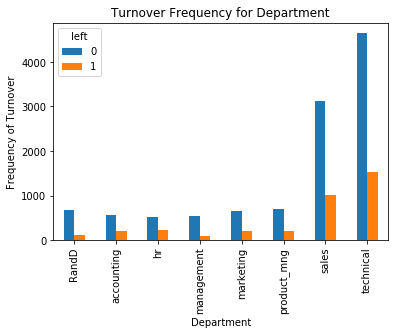

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

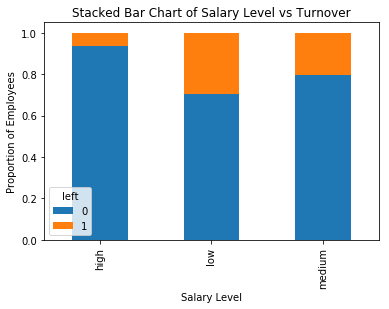

In [11]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

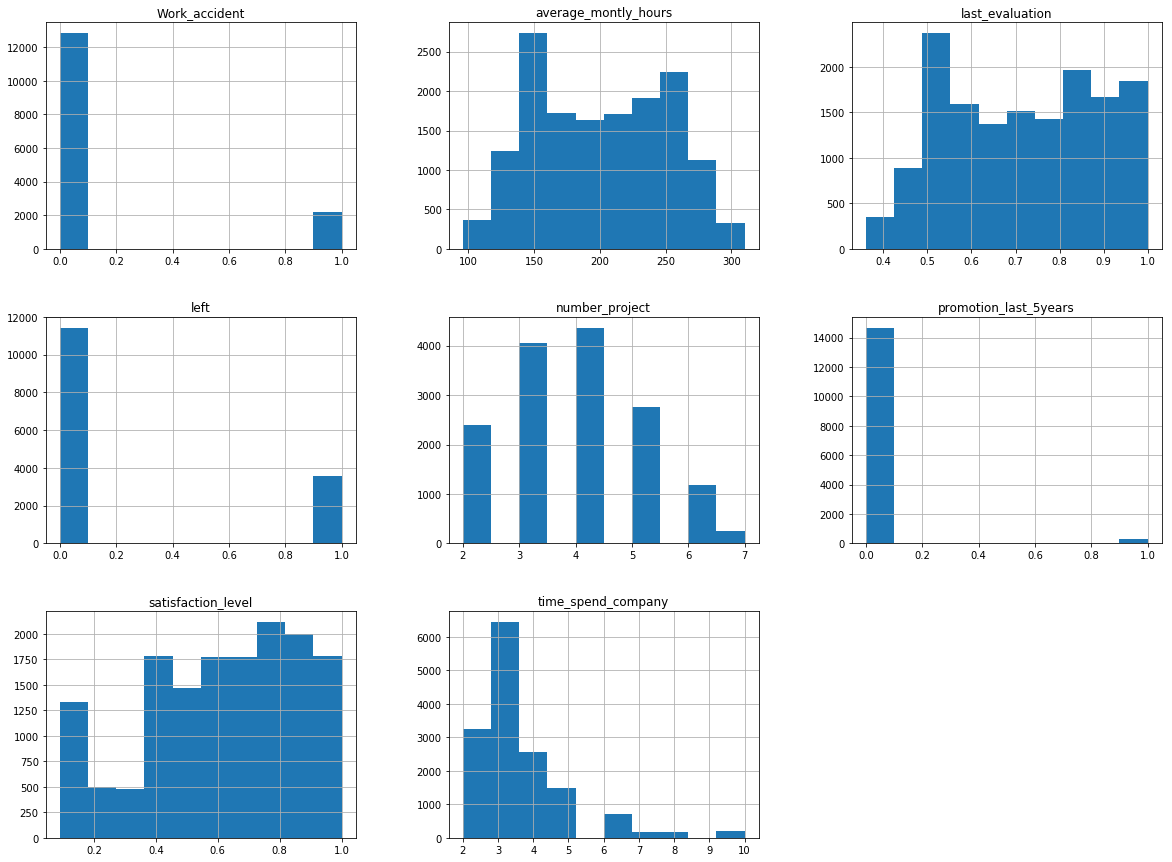

In [12]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [13]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1
    
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [14]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
#hr_vars=hr.columns.values.tolist()
y=['left']
X=hr.drop('left',axis=1).columns


In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])

print(len(rfe.support_))
print(rfe.ranking_)

selected_columns=[]
for i,rfe in zip(X,rfe.support_):
    if rfe:
        selected_columns.append(i)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [17]:
print(selected_columns)
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]

['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']


In [18]:
X=hr[selected_columns]
y=hr['left']


In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


# CROSS VALIDATION

In [25]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)

#results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.980


# Precision and recall

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3462
          1       0.95      0.95      0.95      1038

avg / total       0.98      0.98      0.98      4500



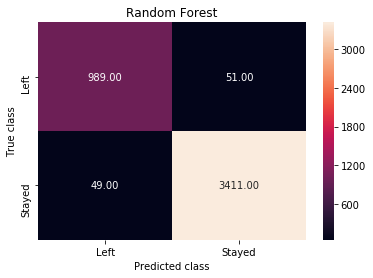

In [27]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

# Logistic Regression

In [28]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86      3462
          1       0.51      0.26      0.35      1038

avg / total       0.74      0.77      0.74      4500



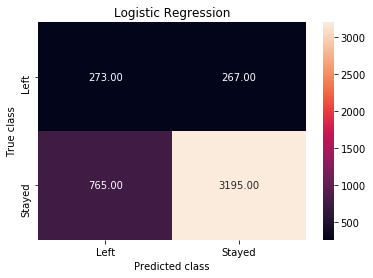

In [29]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

# Support Vector Machine

In [30]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3462
          1       0.77      0.86      0.81      1038

avg / total       0.91      0.91      0.91      4500



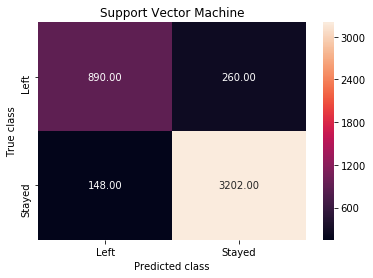

In [31]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

# ROC Curve

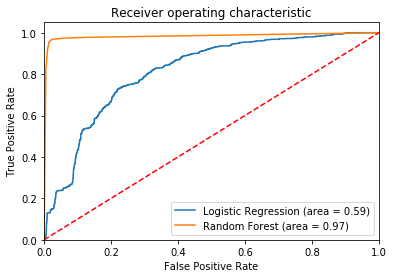

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Feature Importance for Random Forest Model

In [33]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.24%
department_management-0.32%
department_hr-0.34%
department_RandD-0.39%
salary_high-0.69%
salary_low-1.37%
Work_accident-1.56%
last_evaluation-19.60%
time_spend_company-24.50%
satisfaction_level-51.00%


In [34]:
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [35]:
Y=hr['left']
X=hr.drop(['left'],axis=1)

In [36]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
model = Sequential()
#model.add(Dense(20, input_dim=18, activation='relu'))
#model.add(Dense(15, activation='relu'))
model.add(Dense(20, input_dim=18, activation='tanh'))
model.add(Dense(15, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
14999/14999 [==============================] - 2s 128us/step - loss: 0.5341 - acc: 0.7648
Epoch 2/150
14999/14999 [==============================] - 1s 97us/step - loss: 0.4097 - acc: 0.8129
Epoch 3/150
14999/14999 [==============================] - 1s 94us/step - loss: 0.3165 - acc: 0.8663
Epoch 4/150
14999/14999 [==============================] - 1s 99us/step - loss: 0.2856 - acc: 0.8818
Epoch 5/150
14999/14999 [==============================] - 2s 103us/step - loss: 0.2721 - acc: 0.8895
Epoch 6/150
14999/14999 [==============================] - 2s 106us/step - loss: 0.2647 - acc: 0.8930
Epoch 7/150
14999/14999 [==============================] - 2s 107us/step - loss: 0.2585 - acc: 0.8970
Epoch 8/150
14999/14999 [==============================] - 2s 107us/step - loss: 0.2534 - acc: 0.8984
Epoch 9/150
14999/14999 [==============================] - 1s 99us/step - loss: 0.2472 - acc: 0.9031
Epoch 10/150
14999/14999 [==============================] - 2s 102us/step - loss: 0.24

14999/14999 [==============================] - 1s 93us/step - loss: 0.1534 - acc: 0.9517
Epoch 81/150
14999/14999 [==============================] - 1s 95us/step - loss: 0.1543 - acc: 0.9507
Epoch 82/150
14999/14999 [==============================] - 1s 97us/step - loss: 0.1509 - acc: 0.9530
Epoch 83/150
14999/14999 [==============================] - 1s 95us/step - loss: 0.1566 - acc: 0.9499
Epoch 84/150
14999/14999 [==============================] - 1s 97us/step - loss: 0.1542 - acc: 0.9502
Epoch 85/150
14999/14999 [==============================] - 1s 93us/step - loss: 0.1522 - acc: 0.9511
Epoch 86/150
14999/14999 [==============================] - 1s 95us/step - loss: 0.1526 - acc: 0.9515
Epoch 87/150
14999/14999 [==============================] - 1s 92us/step - loss: 0.1546 - acc: 0.9517
Epoch 88/150
14999/14999 [==============================] - 1s 92us/step - loss: 0.1497 - acc: 0.9544
Epoch 89/150
14999/14999 [==============================] - 1s 94us/step - loss: 0.1519 - acc: 